In [1]:
import csv
import numpy as np
import ROOT as rt
from glob import glob
import os
import uproot

from histo_utilities import create_TH1D, create_TH2D


donotdelete = []

Welcome to JupyROOT 6.22/04


# load ROOT files

In [28]:
f = {}
calibration = {}
# f['output'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/20210309/output_runAll_converted.root'
# date = '/20210313/'
# # channel 1 Lyso DUT
# f['ch1_lyso_na22'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Na22Calib_DUT_run1_10_converted.root'
# f['ch1_lyso_cs137'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Cs137Calib_DUT_run11_20_converted.root'
# f['ch1_lyso_co57'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Co57Calib_DUT_run71_80_converted.root'

# # channel 3 NaI DUT
# f['ch3_NaI_na22'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Na22Calib_TAG_run21_40_converted.root'
# f['ch3_NaI_cs137'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Cs137Calib_TAG_run41_60_converted.root'
# f['ch3_NaI_co57'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Co57Calib_TAG_run61_70_converted.root'

# # channel 3 Lyso DUT
# date = '/20210315/'
# f['ch3_lyso_na22'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Na22Calib_lysoTAG_run11_20_converted.root'
# f['ch3_lyso_cs137'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Cs137Calib_lysoTAG_run1_10_converted.root'
# f['ch3_lyso_co57'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Co57Calib_lysoTAG_run21_30_converted.root'

date = '/20210319/'
# # channel 1 Lyso DUT
f['ch1_lyso_na22'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Na22Calib_DUT_run101_200_converted.root'
f['ch1_lyso_cs137'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Cs137Calib_DUT_run251_350_converted.root'
f['ch1_lyso_co57'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Co57Calib_DUT_run351_450_converted.root'

# channel 3 Lyso DUT
f['ch3_lyso_na22'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Na22Calib_TAG_run201_250_converted.root'
f['ch3_lyso_cs137'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Cs137Calib_TAG_run1_50_converted.root'
f['ch3_lyso_co57'] = '/Users/christinawang/Desktop/Caltech/Research/DM/data/'+date+'/output_Co57Calib_TAG_run451_500_converted.root'



#0315
# calibration['ch1'] = [0.0061307, -0.00344695] #p1, p0 / slope, y-intercept
# calibration['ch3_lyso'] = [0.00365619, 0.0151283] #p1, p0 / slope, y-intercept
# calibration['ch3_NaI'] = [0.0048185, 0.00979325] #p1, p0 / slope, y-intercept

#0319, without Co57
calibration['ch1'] = [0.00629087, -0.00606773] #p1, p0 / slope, y-intercept
calibration['ch3_lyso'] = [0.00371937, 0.01129680] #p1, p0 / slope, y-intercept
#with Co57
calibration['ch1'] = [0.00625, -0.01292] #p1, p0 / slope, y-intercept
calibration['ch3_lyso'] = [0.00369, 0.00353] #p1, p0 / slope, y-intercept



plot_path = '/Users/christinawang/Desktop/Caltech/Research/DM/plots/'+date
if not os.path.isdir(plot_path):os.makedirs(plot_path)
# Amp_x_R = 1e-9*(1.0/50.0) * 1e12 # nV to pC
peaks_pc = {}
tree = {}
h = {}
integral = {}
t_peak = {}
t_15 = {}
t_30 = {}
t_45 = {}
for k,v in f.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['pulse']
    a = np.array(tree[k]["i_evt"])
    integral[k] = np.array(tree[k]["integral"]) # in pC
#     if 'ch1' in k:integral[k] = integral[k]*calibration['ch1'][0]+calibration['ch1'][1]
#     elif 'lyso' in k:integral[k] = integral[k]*calibration['ch3_lyso'][0]+calibration['ch3_lyso'][1]
#     else: integral[k] = integral[k]*calibration['ch3_NaI'][0]+calibration['ch3_NaI'][1]
    t_15[k] = np.array(tree[k]["linear_RE_15"])
    t_30[k] = np.array(tree[k]["linear_RE_30"])
    t_45[k] = np.array(tree[k]["linear_RE_45"])
    t_peak[k] = np.array(tree[k]["t_peak"])
    print(integral[k].shape)

ch1_lyso_na22 /Users/christinawang/Desktop/Caltech/Research/DM/data//20210319//output_Na22Calib_DUT_run101_200_converted.root
(500000, 1)
ch1_lyso_cs137 /Users/christinawang/Desktop/Caltech/Research/DM/data//20210319//output_Cs137Calib_DUT_run251_350_converted.root
(500000, 1)
ch1_lyso_co57 /Users/christinawang/Desktop/Caltech/Research/DM/data//20210319//output_Co57Calib_DUT_run351_450_converted.root
(500000, 1)
ch3_lyso_na22 /Users/christinawang/Desktop/Caltech/Research/DM/data//20210319//output_Na22Calib_TAG_run201_250_converted.root
(500000, 1)
ch3_lyso_cs137 /Users/christinawang/Desktop/Caltech/Research/DM/data//20210319//output_Cs137Calib_TAG_run1_50_converted.root
(500000, 1)
ch3_lyso_co57 /Users/christinawang/Desktop/Caltech/Research/DM/data//20210319//output_Co57Calib_TAG_run451_500_converted.root
(500000, 1)


In [29]:
def peak_finding(v,k):
    SS = rt.TSpectrum()
    n_pks = SS.Search(v, 0.1, "", 0.002)
    x_pos = SS.GetPositionX()
    y_pos = SS.GetPositionY()
    pks = []
    print (n_pks)
    for j in range(n_pks):
        if not j == 0:continue
        n_pk = v.FindBin(x_pos[j])
        if j == 0:
            thr = 0.4 * v.GetBinContent(n_pk)
        else:
            thr = 0.4 * v.GetBinContent(n_pk)
        n_low = n_pk
        while v.GetBinContent(n_low) > thr:
            n_low -= 1
        x_low = v.GetBinCenter(n_low)    
        n_up = n_pk
        while v.GetBinContent(n_up) > thr:
            n_up += 1
        x_up = v.GetBinCenter(n_up)
        r = v.Fit('gaus', 'LRSQ+', '', x_low, x_up)
        r = r.Get()
        print( 'Fit p-val = {:.2f}'.format(r.Prob()))
        print(k, 'number in nVs',r.Parameter(1), r.Parameter(2))




# plot Cs137 or Na22 peak

3
Fit p-val = 0.00
ch1_lyso_co57 number in nVs 15.671574161174123 2.1719486330941296


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_spectrum
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/christinawang/Desktop/Caltech/Research/DM/plots//20210319/ch1_lyso_calibration.png has been created


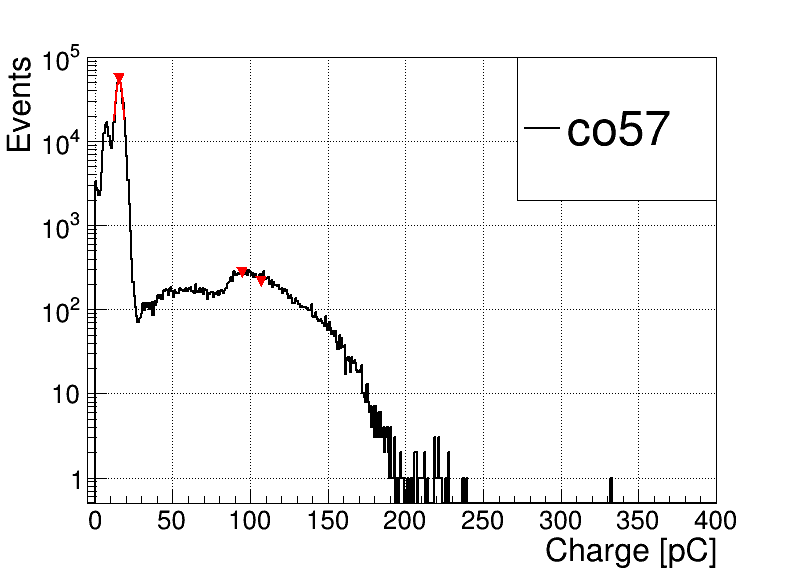

In [44]:

c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
#rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.15,0.65,0.4,0.9)
leg = rt.TLegend(0.65,0.65,0.9,0.9)


ch = 'ch3_lyso'
ch = 'ch1_lyso'
# ch = 'ch3_NaI'
h = {}

i = 0
for k in tree.keys():
    if not ch in k:continue
#     if not 'ch1_lyso_na' in k:continue
    if not 'co' in k:continue
#     h[k] = create_TH1D(integral[k].flatten(), binning = [505,-500,5],axis_title = ['Energy [pC]', 'Events'])
    h[k] = create_TH1D(-1*integral[k].flatten(), binning = [500,-5,400],axis_title = ['Charge [pC]', 'Events'])
#     h[k] = create_TH1D(-1*integral[k].flatten(), binning = [500,150,400],axis_title = ['Charge [pC]', 'Events'])


#     h[k] = create_TH1D(-1*integral[k].flatten(), binning = [500,-0.01,2],axis_title = ['Energy [Mev]', 'Events'])
#     h[k] = create_TH1D(integral[k].flatten(), binning = [500,-2,-1],axis_title = ['Energy [Mev]', 'Events'])


    v = h[k]

    v.SetStats(0)
    v.SetMaximum(100000)
    v.SetTitle('')
    v.GetXaxis().SetTitleSize(0.06)
    v.GetXaxis().SetTitleOffset(0.9)
    v.GetXaxis().SetLabelSize(0.05)

    v.GetYaxis().SetTitleSize(0.06)
    v.GetYaxis().SetTitleOffset(0.9)
    v.GetYaxis().SetLabelSize(0.05)
    v.SetLineColor(i+1)
    v.SetLineWidth(2)
    v.DrawCopy('' if i == 0 else 'same')
    peak_finding(v,k)
    leg.AddEntry(v,k.split('_')[2])
    i+=1
c.SetLeftMargin(0.11)
c.SetBottomMargin(0.12)

leg.Draw()
c.SetLogy()
c.SetGrid()
c.Draw()
c.SaveAs(plot_path+ch+'_calibration.png')
donotdelete.append(c)

In [22]:
peak_finding(v,k)

2
Fit p-val = 0.01
ch3_lyso_co57 number in nVs -0.6605652848028356 0.025915452551411446


KeyboardInterrupt: 

In [46]:
# gamma: 0.014 MeV (9.54 %) 0.122 MeV (85.6 %) 0.136 MeV (10.6 %) 0.692 MeV (0.02 %)

peaks = {}
peaks_err = {}
#20210304
# peaks['ch1'] = [0, -5.280926192021228, -12.95931811267492]
# peaks['ch3'] = [0, -5.7478335887749, -13.721213969219207]

# #20210309
# peaks['ch1'] = [0, -4.197522172095162, -10.466599908996663]
# peaks['ch3'] = [0, -6.15048884630184, -13.679261889284437]


# #20210309, pC to MeV
# peaks['ch1'] = [0, -83.95044344192999, -209.33199817997013]
# peaks['ch3'] = [0, -83.95044344192999, -209.33199817997013]

#20210313, pC to Mev
# peaks['ch1_lyso'] = [0, -82.66076459305629, -106.42531775932673, -207.96680971672873] #lyso PMT, xp2020
# peaks['ch3_NaI'] = [0,  -145.958, -191.744, -348.398] #NaI PMT, p-14
# peaks['ch3_lyso'] = [0,  -109.84651970415523, -141.5687274233969, -264.7561893719911] #NaI PMT, p-14

#20210319, pC to Mev
#without co57
# peaks['ch1_lyso'] = [0, -78.62749, -104.34206, -202.30791] #lyso PMT, xp2020
# peaks['ch3_lyso'] = [0,  -142.62112, -184.83235, -342.87100] #NaI PMT, p-14

# y_peak = [0, 0.511,0.662, 1.275]
#with co57
# peaks['ch1_lyso'] = [0, -15.69235,-78.62749, -104.34206, -202.30791] #lyso PMT, xp2020
# peaks['ch3_lyso'] = [0,  -30.68574, -142.62112, -184.83235, -342.87100] #NaI PMT, p-14

# y_peak = [ 0.0, 0.122,  0.511,0.662, 1.275]

peaks['ch1_lyso'] = [ 15.69235,78.62749, 104.34206, 202.30791] #lyso PMT, xp2020
peaks['ch3_lyso'] = [  30.68574, 142.62112, 184.83235, 342.87100] #NaI PMT, p-14
peaks_err['ch1_lyso'] = [ 2.1719486330941296,5.639255305286408, 6.224521763171896, 8.54237872689275] #lyso PMT, xp2020
peaks_err['ch3_lyso'] = [  3.016469582987398, 6.389292976553309, 7.127491679735589, 8.268431043952758] #NaI PMT, p-14


 
y_peak = [  0.122,  0.511,0.662, 1.275]

In [55]:
gr_gain = {}
for k in peaks.keys():
    gr_gain[k] = rt.TGraphErrors(len(peaks[k]))
    for i in range(len(peaks[k])):
        gr_gain[k].SetPoint(int(i), peaks[k][i], y_peak[i])
        gr_gain[k].SetPointError(int(i), peaks_err[k][i],0.0)



****************************************
Minimizer is Minuit / Migrad
Chi2                      =      1.42083
NDf                       =            2
Edm                       =    6.626e-10
NCalls                    =           55
p0                        =   0.00632371   +/-   0.0122651   
p1                        =   0.00364309   +/-   9.20943e-05 

ch3_lyso p-val = 0.491
 FCN=1.42083 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=6.626e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.32371e-03   1.22651e-02   6.73827e-06  -6.63524e-04
   2  p1           3.64309e-03   9.20943e-05   5.05913e-08   3.29048e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_gain


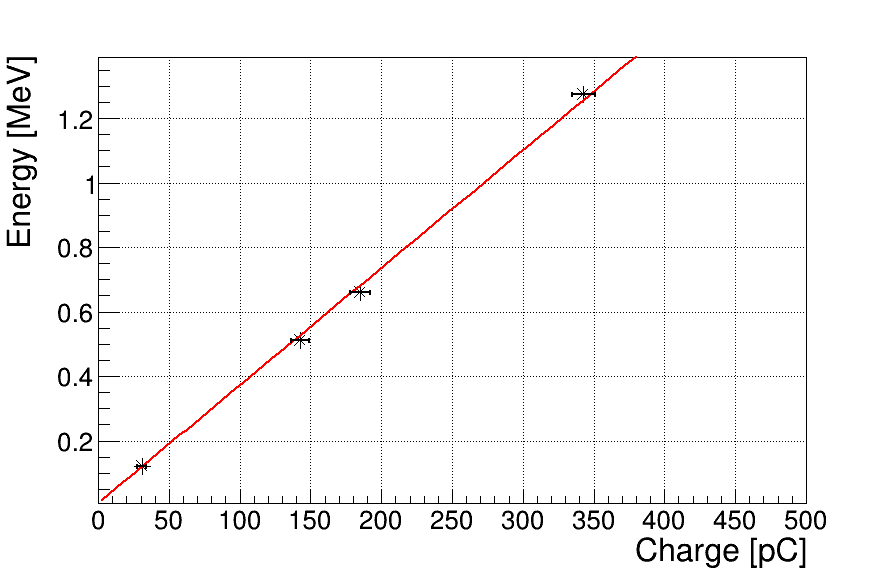

In [60]:
c_gain = rt.TCanvas('c_gain', 'c_gain', 900, 600)

for i, k in enumerate(gr_gain.keys()):
    if not i == 1:continue
    r = gr_gain[k].Fit('pol1', 'S')
    r = r.Get()
    print(r)
    print(k, 'p-val = {:.3f}'.format(r.Prob()))
    
    gr_gain[k].SetMarkerColor(1)
    gr_gain[k].SetMarkerSize(2)
    gr_gain[k].SetLineWidth(2)



    gr_gain[k].Draw('AP*E1' if i== 0 else 'AP*E1 same')
    gr_gain[k].Draw('AP*E1')


    gr_gain[k].SetTitle("")
    gr_gain[k].GetXaxis().SetTitle('Charge [pC]')
    gr_gain[k].GetYaxis().SetTitle('Energy [MeV]')
    gr_gain[k].GetYaxis().SetLimits(0,2)
    if i == 0: gr_gain[k].GetXaxis().SetLimits(0, 300)
    else:gr_gain[k].GetXaxis().SetLimits(0, 500)


    gr_gain[k].GetXaxis().SetTitleSize(0.06)
    gr_gain[k].GetXaxis().SetTitleOffset(0.9)
    gr_gain[k].GetXaxis().SetLabelSize(0.05)

    gr_gain[k].GetYaxis().SetTitleSize(0.06)
    gr_gain[k].GetYaxis().SetTitleOffset(0.9)
    gr_gain[k].GetYaxis().SetLabelSize(0.05)

c_gain.SetLeftMargin(0.11)
c_gain.SetBottomMargin(0.12)

c_gain.SetGrid()
c_gain.Draw()

# rt.gStyle.SetOptFit(0)

In [44]:
# t_15[k].shape
integral[k].shape

(100000, 1)

ch1_lyso_na2215 0.0
ch1_lyso_na2230 0.0
ch1_lyso_na2245 0.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_spectrum
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


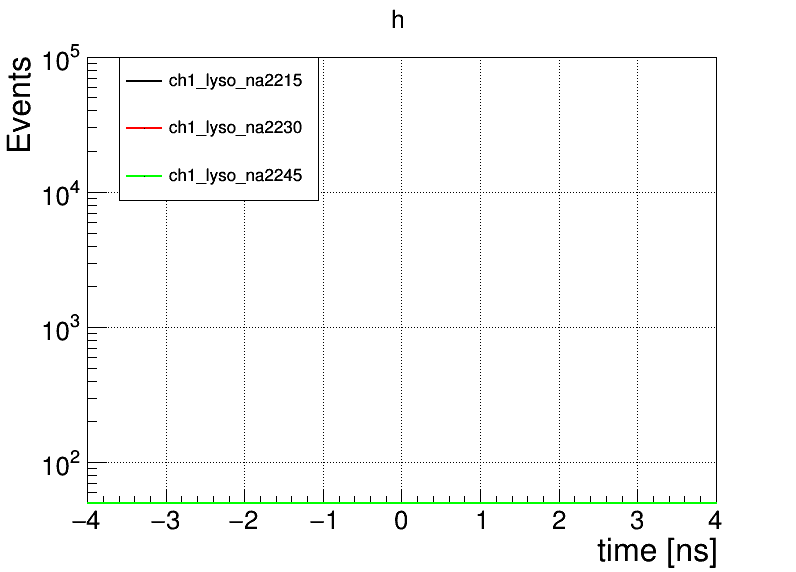

In [80]:
# plot time


c = rt.TCanvas('c_spectrum', 'c_spectrum', 800, 600)
#rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetOptFit(000002200)
# rt.gStyle.SetTitleSize(0.8)
leg = rt.TLegend(0.15,0.65,0.4,0.9)
# ch = 'ch3_lyso'
ch = 'ch1_lyso'
# ch = 'ch3_NaI'
h = {}

i = 0
for k in tree.keys():
    if not ch in k:continue
    if not 'na' in k:continue
#     if not 'na' in k:continue
    bins = [500,-4,4]
    cond = np.logical_and(integral[k]<-100, integral[k]>-125)
    h[k+'15'] = create_TH1D(t_15[k][cond], binning = bins,axis_title = ['time [ns]', 'Events'])
    h[k+'30'] = create_TH1D(t_30[k][cond], binning = bins,axis_title = ['time [ns]', 'Events'])
    h[k+'45'] = create_TH1D(t_45[k][cond], binning = bins ,axis_title = ['time [ns]', 'Events'])

#     h[k+'peak'] = create_TH1D(t_peak[k][cond], binning = bins,axis_title = ['time [ns]', 'Events'])




for i,k in enumerate(h.keys()):
    print(k,h[k].Integral())

    v = h[k]

#     peak_finding(v)

    v.SetStats(0)
    v.SetMaximum(100000)
    v.GetXaxis().SetTitleSize(0.06)
    v.GetXaxis().SetTitleOffset(0.9)
    v.GetXaxis().SetLabelSize(0.05)

    v.GetYaxis().SetTitleSize(0.06)
    v.GetYaxis().SetTitleOffset(0.9)
    v.GetYaxis().SetLabelSize(0.05)
    v.SetLineColor(i+1)
    v.SetLineWidth(2)
    v.DrawCopy('' if i == 0 else 'same')
    leg.AddEntry(v,k)
    i+=1
c.SetLeftMargin(0.11)
c.SetBottomMargin(0.12)

leg.Draw()
c.SetLogy()
c.SetGrid()
c.Draw()
# c.SaveAs(plot_path+ch+'_calibration.png')
donotdelete.append(c)